In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

df = pd.read_csv('Desafio4_modelamiento.csv')


In [19]:
print(f"El Dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas")

El Dataset contiene 307511 filas y 122 columnas


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
column type,int64,int64,object,object,object,object,int64,float64,float64,float64,...,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,41519,41519,41519,41519,41519,41519
null values (%),0,0,0,0,0,0,0,0,0,0.0039023,...,0,0,0,0,13.5016,13.5016,13.5016,13.5016,13.5016,13.5016


In [23]:
def informacion_basica_dataset(dataset, column):
    total_values = len(dataset[column])
    null_values = len(dataset[dataset[column].isnull()])
    unique_values = len(dataset[column].unique())

    result = pd.DataFrame({
        'column': [column],
        'total_values': [total_values],
        'null_values': [null_values],
        'unique_values': [unique_values]
    }
    )

    return result

resumen_df = pd.concat([informacion_basica_dataset(df,col) for col in df.columns])
resumen_df

,column,total_values,null_values,unique_values
0,SK_ID_CURR,307511,0,307511
0,TARGET,307511,0,2
0,NAME_CONTRACT_TYPE,307511,0,2
0,CODE_GENDER,307511,0,3
0,FLAG_OWN_CAR,307511,0,2
...,...,...,...,...
0,AMT_REQ_CREDIT_BUREAU_DAY,307511,41519,10
0,AMT_REQ_CREDIT_BUREAU_WEEK,307511,41519,10
0,AMT_REQ_CREDIT_BUREAU_MON,307511,41519,25
0,AMT_REQ_CREDIT_BUREAU_QRT,307511,41519,12


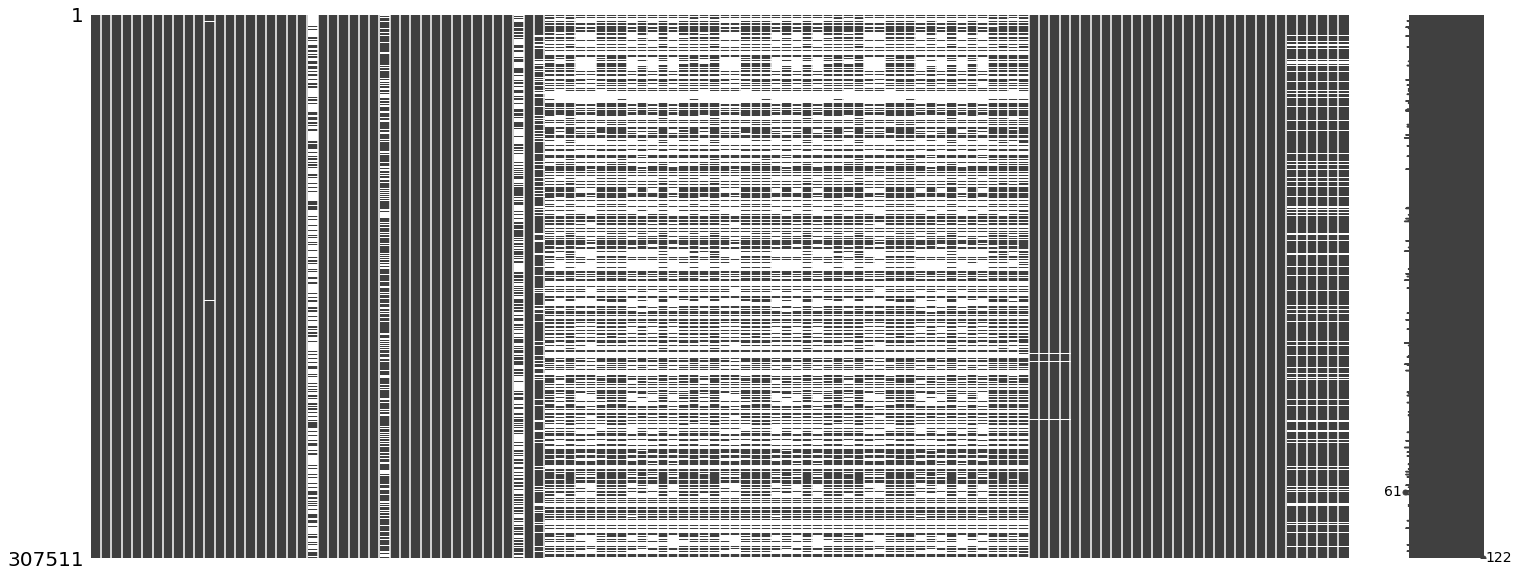

In [26]:
msno.matrix(df)

In [24]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

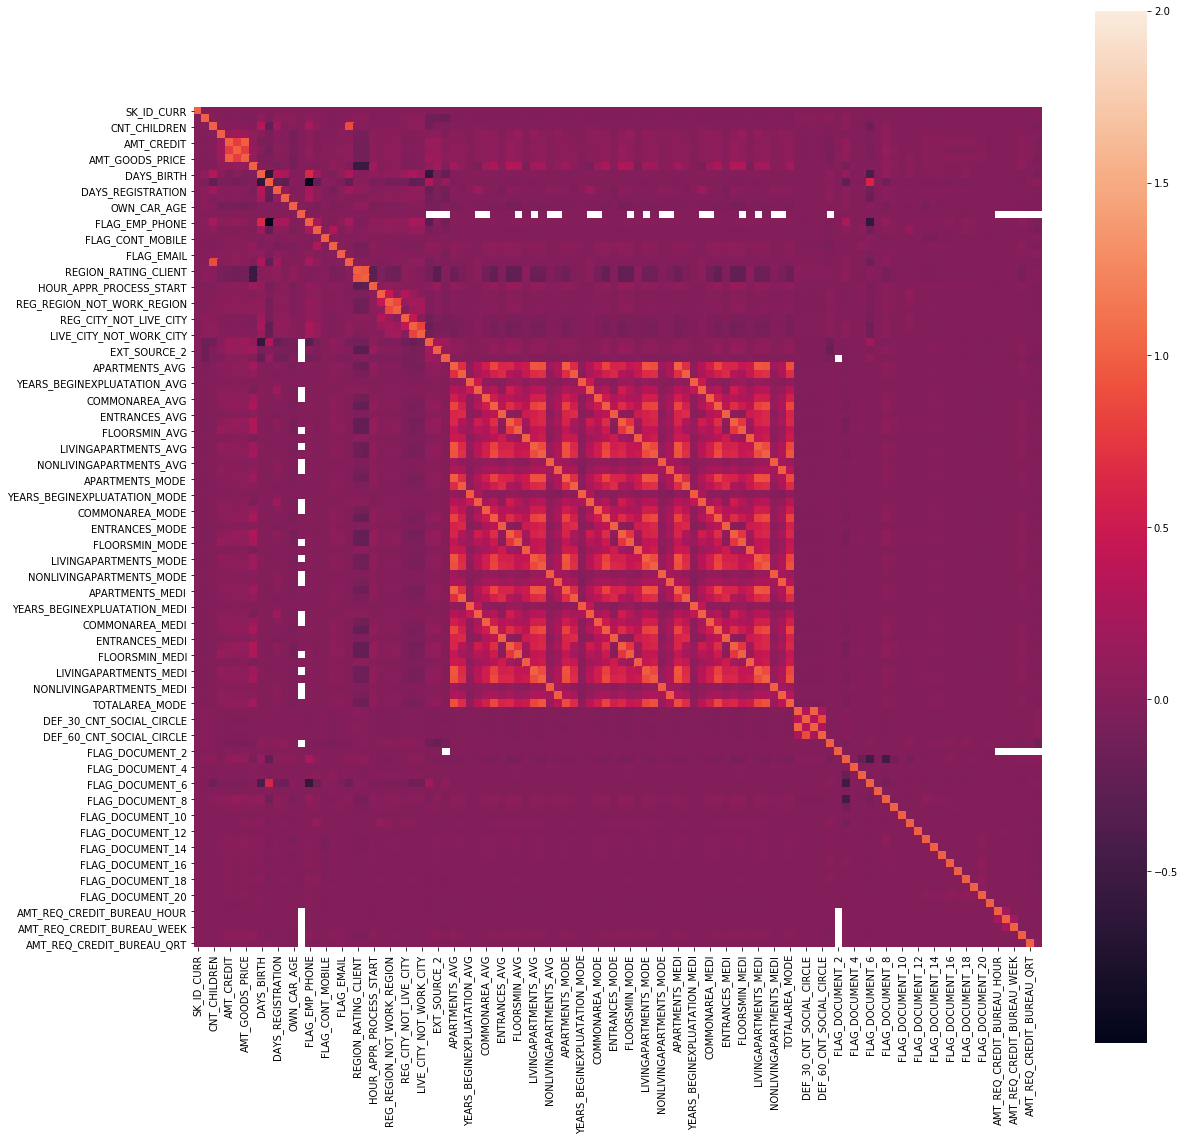

In [28]:
# Matriz de correlación:

corrmat = df.corr()
plt.figure(figsize=(19, 19))
sns.heatmap(corrmat, vmax=2,square=True, annot=False);

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!